### Import the relevant libraries :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset :

In [2]:
path = ("D:\Chrome download\churn.csv")

In [3]:
df = pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum().to_frame()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df.shape

(7043, 21)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Dropping the irrelevant column :

In [9]:
 df.drop('customerID', axis=1, inplace=True)

### Customer Churn :

In [10]:
df['Churn'].value_counts().to_frame()

,Churn
No,5174
Yes,1869


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


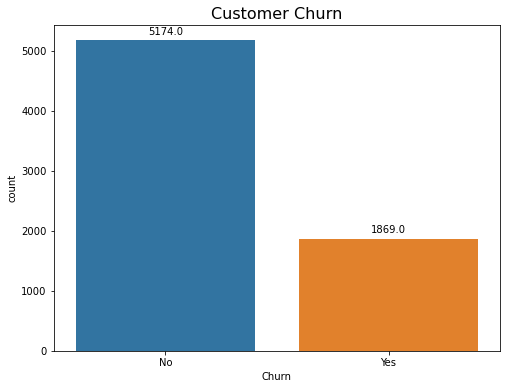

In [11]:
plt.figure(figsize=(8, 6));
plt.title('Customer Churn', size=16);
splot=sns.countplot(df['Churn']);
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points');

### % of customer leaving :

In [12]:
churn_data = df['Churn'].value_counts().to_frame()

In [13]:
churn_data.reset_index(inplace=True)

In [14]:
churn_data.rename(columns={'index':'Churn', 'Churn':'Count'}, inplace=True)

In [15]:
churn_data['Churn']=churn_data['Churn'].map({"No":"Retained", "Yes":"Churn"})

In [16]:
churn_data

,Churn,Count
0,Retained,5174
1,Churn,1869


In [17]:
print(churn_data['Count'].loc[0]/churn_data['Count'].sum()*100, "% of customers stayed in the company")

73.4630129206304 % of customers stayed in the company


In [18]:
print(churn_data['Count'].loc[1]/churn_data['Count'].sum()*100, "% of customers left with the company")

26.536987079369588 % of customers left with the company


### Visualizing the churn count among gender:

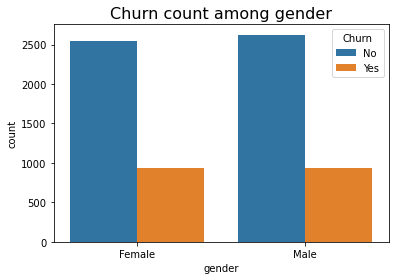

In [19]:
plt.title("Churn count among gender", size=16);
sns.countplot(x ='gender', hue='Churn', data=df);

### Churn count of Internet Service :

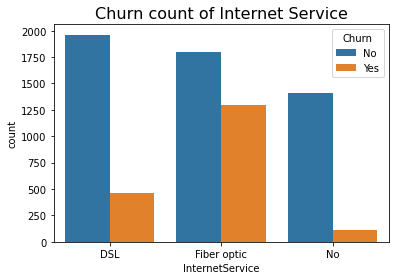

In [22]:
plt.title("Churn count of Internet Service", size=16);
sns.countplot(x='InternetService', hue='Churn', data=df);

#### Distribution on tenure and monthly charges while retaintion :

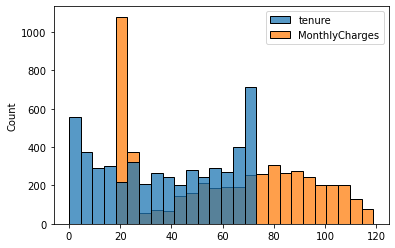

In [23]:
sns.histplot(df[df.Churn == "No"][['tenure', 'MonthlyCharges']]);

#### Distribution on tenure and monthly charges while churn:

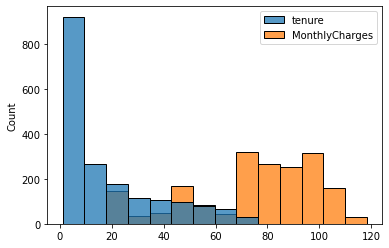

In [24]:
sns.histplot(df[df.Churn == "Yes"][['tenure', 'MonthlyCharges']]);

### Converting the categorical column into numerical :

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
df.nunique().to_frame()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [27]:
df = df.apply(LabelEncoder().fit_transform)

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


### Creating the train and test data :

In [132]:
x = df.iloc[:,df.columns!='Churn']
y = df['Churn']

In [133]:
x.shape

(7043, 19)

In [134]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,2660


### Scaling the data :

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
x = StandardScaler().fit_transform(x)

In [137]:
x.shape

(7043, 19)

### Splitting the dataset :

In [139]:
from sklearn.model_selection import train_test_split

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

### Building the logistic regression model :

In [164]:
from sklearn.linear_model import LogisticRegression

In [188]:
model = LogisticRegression()

#### Training the model :

In [189]:
model.fit(x_train, y_train)

LogisticRegression()

In [190]:
pred = model.predict(x_test)

In [191]:
pd.DataFrame(list(zip(pred, y_test)), columns=['Predicted', 'Actual']).head()

,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


### Model Accuracy :

In [192]:
model.score(x_train, y_train)

0.8067092651757188

In [193]:
from sklearn.metrics import confusion_matrix

In [194]:
cnf = confusion_matrix(y_test, pred)

In [195]:
cnf

array([[934, 107],
       [182, 186]], dtype=int64)

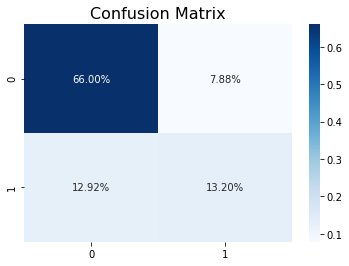

In [171]:
plt.title("Confusion Matrix", size=16)
sns.heatmap(cnf/np.sum(cnf), annot=True, fmt='.2%', cmap='Blues');

###  Precision, recall and f1-score:

In [196]:
from sklearn.metrics import classification_report

In [204]:
print("Clssification Report :\n",  classification_report(y_test, pred))

Clssification Report :
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.63      0.51      0.56       368

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409

